In [35]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import xarray as xr
import matplotlib.pylab as plt
import cartopy.crs as ccrs 

In [39]:
ds = xr.open_dataset("/Users/haas/africa-lr_soilchemistry.nc")
dsnew = ds.groupby("time.year").sum(dim="time", skipna=False)
dsnew


<xarray.Dataset>
Dimensions:       (lat: 160, lon: 160, year: 5)
Coordinates:
  * lat           (lat) float64 -39.75 -39.25 -38.75 ... 38.75 39.25 39.75
  * lon           (lon) float64 -19.75 -19.25 -18.75 ... 58.75 59.25 59.75
  * year          (year) int64 2000 2001 2002 2003 2004
Data variables:
    dN_n2o_emis   (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    dN_n2_emis    (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    dN_no_emis    (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    dN_nh3_emis   (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    dN_no3_leach  (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

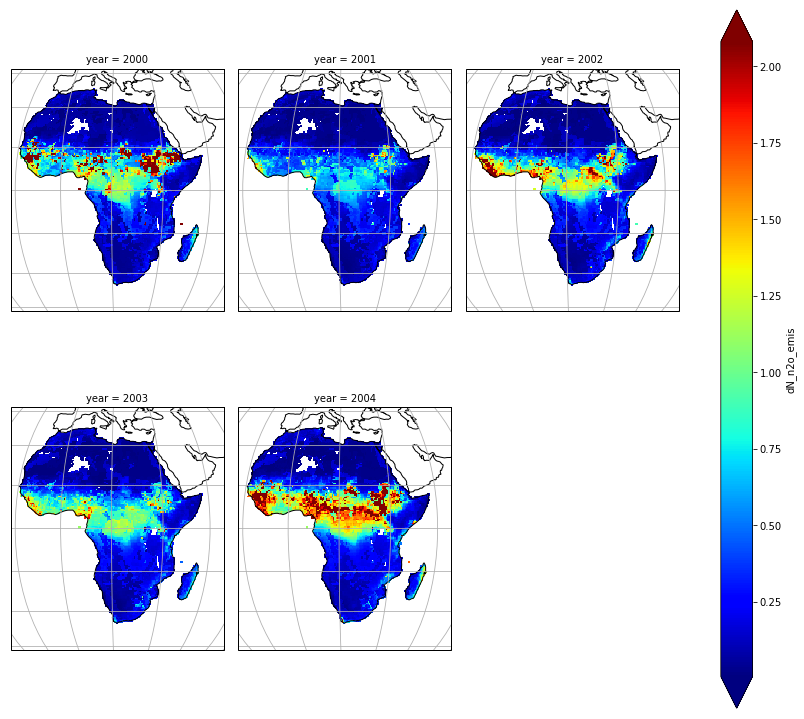

In [47]:

p=dsnew.dN_n2o_emis.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    
#plt.title("N2O in Africa")

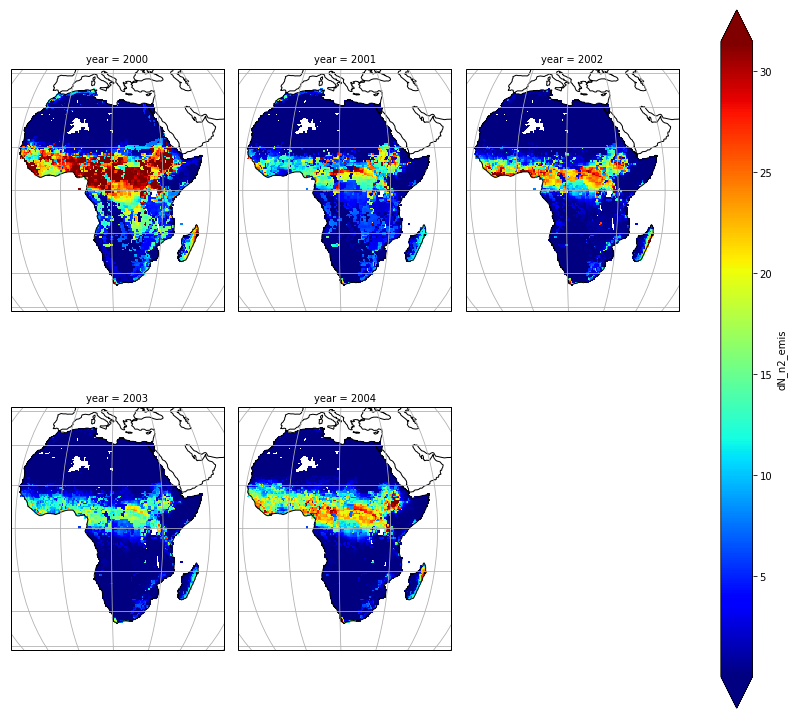

In [42]:
p=dsnew.dN_n2_emis.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    

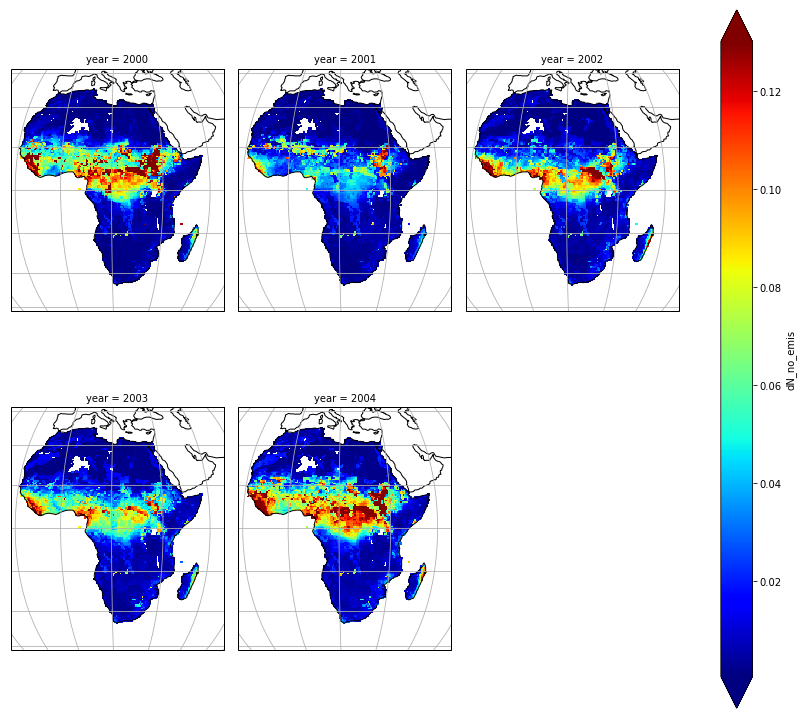

In [43]:
p=dsnew.dN_no_emis.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    

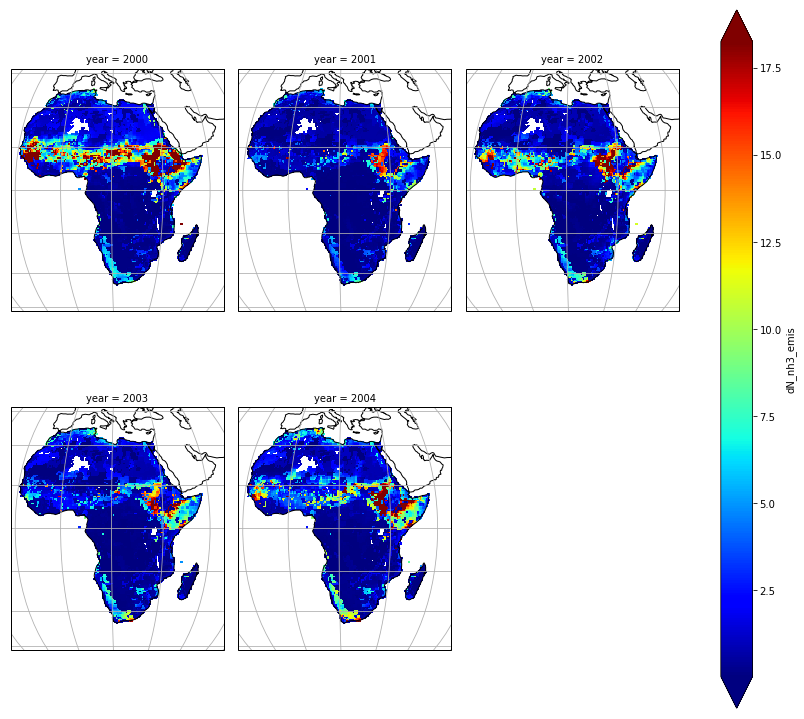

In [44]:
p=dsnew.dN_nh3_emis.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    



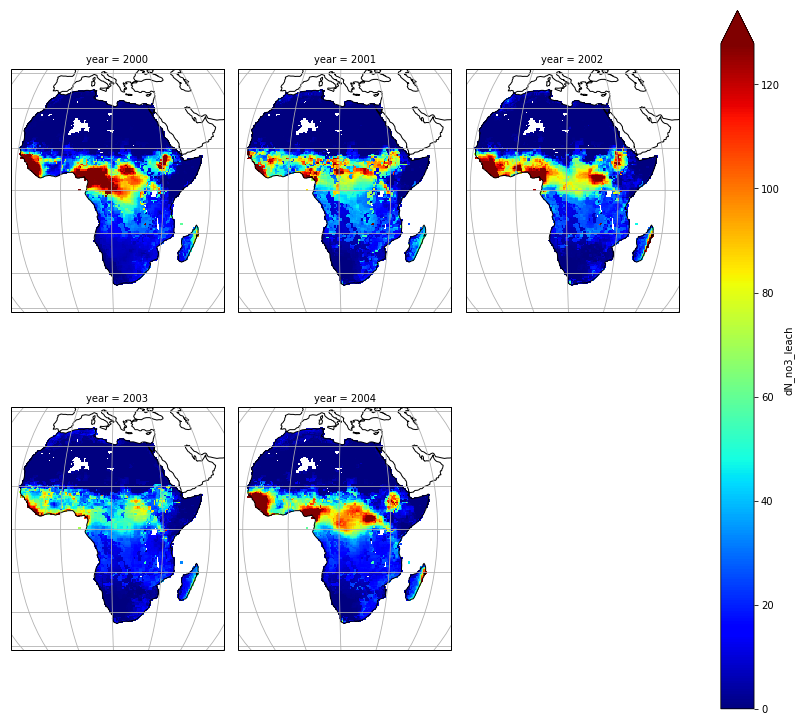

In [45]:
p=dsnew.dN_no3_leach.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    

In [37]:
dsnew.to_netcdf("/Users/haas/africa-lr_sc-yearly.nc")